## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Set file paths for train and predict datasets

In [2]:
train_dataset = "Dataset/Train.csv"
predict_dataset = "Dataset/Test.csv"

## Get train and predict dataset info

In [26]:
train_df = pd.read_csv(train_dataset)
train_df.head()

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner
0,5,4,37,4,Home,Away,Second,First,Dec,4
1,1,14,84,7,Neutral,Neutral,First,Second,Sep,1
2,9,15,47,9,Home,Away,First,Second,Feb,9
3,7,2,102,6,Home,Away,First,Second,Aug,2
4,6,8,46,5,Home,Away,First,Second,Aug,6


In [27]:
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team1          2508 non-null   int64 
 1   Team2          2508 non-null   int64 
 2   Stadium        2508 non-null   int64 
 3   HostCountry    2508 non-null   int64 
 4   Team1_Venue    2508 non-null   object
 5   Team2_Venue    2508 non-null   object
 6   Team1_Innings  2508 non-null   object
 7   Team2_Innings  2508 non-null   object
 8   MonthOfMatch   2508 non-null   object
 9   MatchWinner    2508 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 196.1+ KB


In [28]:
predict_df = pd.read_csv(predict_dataset)
predict_df.head()

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch
0,2,4,34,1,Home,Away,First,Second,Oct
1,14,1,19,15,Home,Away,First,Second,Mar
2,9,10,130,14,Neutral,Neutral,Second,First,Dec
3,9,10,8,9,Home,Away,First,Second,Dec
4,5,15,130,14,Neutral,Neutral,First,Second,Oct


In [29]:
predict_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team1          1075 non-null   int64 
 1   Team2          1075 non-null   int64 
 2   Stadium        1075 non-null   int64 
 3   HostCountry    1075 non-null   int64 
 4   Team1_Venue    1075 non-null   object
 5   Team2_Venue    1075 non-null   object
 6   Team1_Innings  1075 non-null   object
 7   Team2_Innings  1075 non-null   object
 8   MonthOfMatch   1075 non-null   object
dtypes: int64(4), object(5)
memory usage: 75.7+ KB


## Data Preprocessing

In [ ]:
# One-hot encoding for "Team1" field
dummy_val = pd.get_dummies(train_df['Team1'], prefix='Team1')
train_df = pd.concat([train_df, dummy_val], axis=1)

In [ ]:
# One-hot encoding for "Team2" field
dummy_val = pd.get_dummies(train_df['Team2'], prefix='Team2')
train_df = pd.concat([train_df, dummy_val], axis=1)

In [ ]:
# One-hot encoding for "Stadium" field
dummy_val = pd.get_dummies(train_df['Stadium'], prefix='Stadium')
train_df = pd.concat([train_df, dummy_val], axis=1)

In [ ]:
# One-hot encoding for "HostCountry" field
dummy_val = pd.get_dummies(train_df['HostCountry'], prefix='HostCountry')
train_df = pd.concat([train_df, dummy_val], axis=1)

In [30]:
# One-hot encoding for "Team1_Venue" field
dummy_val = pd.get_dummies(train_df['Team1_Venue'], prefix='Team1_Venue')
train_df = pd.concat([train_df, dummy_val], axis=1)

In [31]:
# One-hot encoding for "Team2_Venue" field
dummy_val = pd.get_dummies(train_df['Team2_Venue'], prefix='Team2_Venue')
train_df = pd.concat([train_df, dummy_val], axis=1)

In [32]:
# One-hot encoding for "Team1_Innings" field
dummy_val = pd.get_dummies(train_df['Team1_Innings'], prefix='Team1_Innings')
train_df = pd.concat([train_df, dummy_val], axis=1)

In [33]:
# One-hot encoding for "Team2_Innings" field
dummy_val = pd.get_dummies(train_df['Team2_Innings'], prefix='Team2_Innings')
train_df = pd.concat([train_df, dummy_val], axis=1)

In [ ]:
# One-hot encoding for "MonthOfMatch" field
dummy_val = pd.get_dummies(train_df['MonthOfMatch'], prefix='MonthOfMatch')
train_df = pd.concat([train_df, dummy_val], axis=1)

In [ ]:
train_df['Team1_Venue'] = train_df['Team1_Venue'].apply(lambda x: 1 if x=='Home' else -1 if x=='Away' else 0)
train_df['Team2_Venue'] = train_df['Team2_Venue'].apply(lambda x: 1 if x=='Home' else -1 if x=='Away' else 0)

train_df['Team1_Innings'] = train_df['Team1_Innings'].apply(lambda x: 1 if x=='First' else 2)
train_df['Team2_Innings'] = train_df['Team2_Innings'].apply(lambda x: 1 if x=='First' else 2)

In [34]:
train_df['MonthOfMatch'] = train_df['MonthOfMatch'].apply(lambda x: {
        'Jan' : 1,
        'Feb' : 2,
        'Mar' : 3,
        'Apr' : 4,
        'May' : 5,
        'Jun' : 6,
        'Jul' : 7,
        'Aug' : 8,
        'Sep' : 9, 
        'Oct' : 10,
        'Nov' : 11,
        'Dec' : 12
}[x])

In [35]:
train_df.head()

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner,Team1_Venue_Away,Team1_Venue_Home,Team1_Venue_Neutral,Team2_Venue_Away,Team2_Venue_Home,Team2_Venue_Neutral,Team1_Innings_First,Team1_Innings_Second,Team2_Innings_First,Team2_Innings_Second
0,5,4,37,4,Home,Away,Second,First,12,4,0,1,0,1,0,0,0,1,1,0
1,1,14,84,7,Neutral,Neutral,First,Second,9,1,0,0,1,0,0,1,1,0,0,1
2,9,15,47,9,Home,Away,First,Second,2,9,0,1,0,1,0,0,1,0,0,1
3,7,2,102,6,Home,Away,First,Second,8,2,0,1,0,1,0,0,1,0,0,1
4,6,8,46,5,Home,Away,First,Second,8,6,0,1,0,1,0,0,1,0,0,1


## Examine correlation of raw data

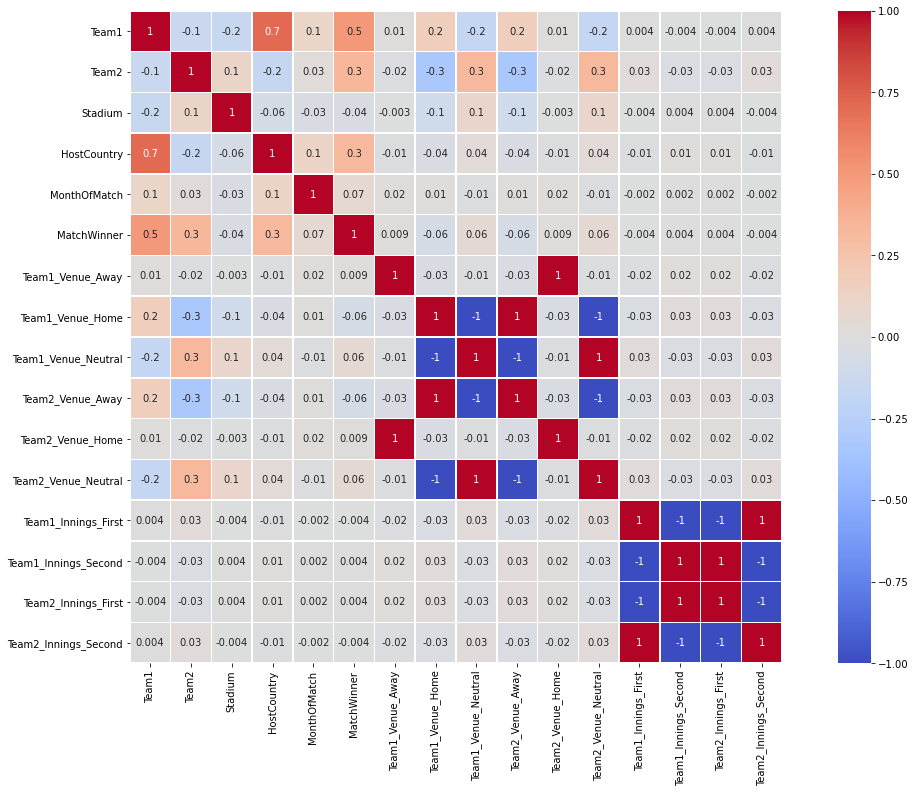

In [36]:
plt.figure(figsize=(20,12))
ax = sns.heatmap(train_df.corr(), annot=True, linewidth = 0.5, cmap='coolwarm', 
                 fmt='.1g', vmin=-1, vmax=1, center= 0, square=True)